In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL',api_key= '952e16c7648ffaca67d3021c753cedc588657865')

/var/folders/vw/n65t9rg52vjb327j3k2wqxlr0000gn/T/ipykernel_93382/2528967154.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key= '952e16c7648ffaca67d3021c753cedc588657865')


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [9]:
 df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-08-30 00:00:00+00:00,208.74,210.45,207.20,210.16,21162561,50.499176,50.912866,50.126614,50.842708,84650244,0.0,1.0
1,AAPL,2019-09-03 00:00:00+00:00,205.70,206.98,204.22,206.43,20059574,49.763728,50.073390,49.405681,49.940332,80238296,0.0,1.0
2,AAPL,2019-09-04 00:00:00+00:00,209.19,209.48,207.32,208.39,19216820,50.608042,50.678200,50.155645,50.414503,76867280,0.0,1.0
3,AAPL,2019-09-05 00:00:00+00:00,213.28,213.97,211.51,212.00,23946984,51.597510,51.764438,51.169305,51.287848,95787936,0.0,1.0
4,AAPL,2019-09-06 00:00:00+00:00,213.26,214.42,212.51,214.05,19362294,51.592672,51.873304,51.411229,51.783792,77449176,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2024-08-21 00:00:00+00:00,226.40,227.98,225.0500,226.5200,34765480,226.40,227.98,225.0500,226.5200,34765480,0.0,1.0
1252,AAPL,2024-08-22 00:00:00+00:00,224.53,228.34,223.9000,227.7900,43695321,224.53,228.34,223.9000,227.7900,43695321,0.0,1.0
1253,AAPL,2024-08-23 00:00:00+00:00,226.84,228.22,224.3300,225.6589,38677250,226.84,228.22,224.3300,225.6589,38677250,0.0,1.0
1254,AAPL,2024-08-26 00:00:00+00:00,227.18,227.28,223.8905,226.7600,30602208,227.18,227.28,223.8905,226.7600,30602208,0.0,1.0
1255,AAPL,2024-08-27 00:00:00+00:00,228.03,228.85,224.8900,225.9950,35934559,228.03,228.85,224.8900,225.9950,35934559,0.0,1.0


In [13]:
df1 = df.reset_index()['close']

In [17]:
df1

0       208.74
1       205.70
2       209.19
3       213.28
4       213.26
         ...  
1251    226.40
1252    224.53
1253    226.84
1254    227.18
1255    228.03
Name: close, Length: 1256, dtype: float64

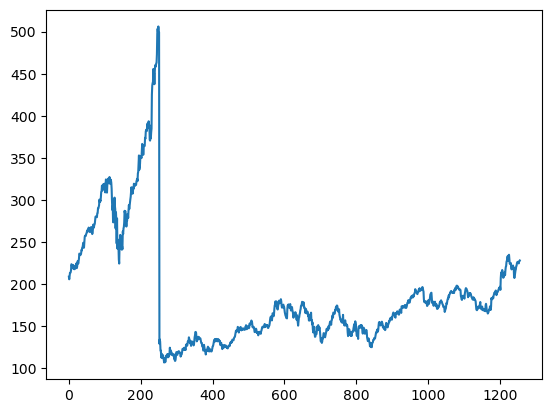

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [21]:
import numpy as np
df1

In [22]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scalen
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler (feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1.shape


(1256, 1)

In [24]:
df1

array([[0.25522855],
       [0.24761428],
       [0.25635567],
       ...,
       [0.30056356],
       [0.30141515],
       [0.30354415]])

In [25]:
##splitting dataset into train and test split
training_size=int(len(df1) *0.70) 
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size, :],df1[training_size:len(df1),:1]

In [26]:
training_size, test_size

(879, 377)

In [28]:
import numpy

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1) :

    dataX, dataY = [], []

    for i in range(len(dataset) -time_step-1):

        a = dataset[i: (i+time_step), 0]

        dataX.append(a)

        dataY.append(dataset[i + time_step, 0])

    return numpy.array(dataX), numpy.array(dataY)

In [29]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
x_train, y_train = create_dataset (train_data, time_step)
x_test, y_test = create_dataset (test_data, time_step)

In [30]:
print(x_train)

[[0.25522855 0.24761428 0.25635567 ... 0.52530996 0.52814026 0.53197245]
 [0.24761428 0.25635567 0.26659987 ... 0.52814026 0.53197245 0.52966813]
 [0.25635567 0.26659987 0.26654978 ... 0.53197245 0.52966813 0.50622417]
 ...
 [0.10770194 0.08926738 0.07854728 ... 0.11739512 0.11448967 0.10429555]
 [0.08926738 0.07854728 0.08919224 ... 0.11448967 0.10429555 0.10537257]
 [0.07854728 0.08919224 0.09833438 ... 0.10429555 0.10537257 0.10659987]]


In [31]:
print(x_test.shape), print(y_test.shape)

(276, 100)
(276,)


(None, None)

In [34]:
#reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train. reshape(x_train. shape[0],x_train.shape[1] , 1)
x_test = x_test. reshape(x_test. shape[0],x_test.shape [1] , 1)

In [35]:

### Create the LSTM model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow. keras.layers import LSTM

In [36]:
model = Sequential()
model.add(LSTM(50, input_shape=(100, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model. fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 37ms/step - loss: 0.0457 - val_loss: 0.0041
Epoch 2/100
13/13 [==============================] - 0s 28ms/step - loss: 0.0131 - val_loss: 7.4587e-04
Epoch 3/100
13/13 [==============================] - 0s 27ms/step - loss: 0.0077 - val_loss: 5.5033e-04
Epoch 4/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0063 - val_loss: 6.0113e-04
Epoch 5/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0059 - val_loss: 3.0709e-04
Epoch 6/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0054 - val_loss: 3.5481e-04
Epoch 7/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0051 - val_loss: 6.5314e-04
Epoch 8/100
13/13 [==============================] - 0s 25ms/step - loss: 0.0057 - val_loss: 2.7116e-04
Epoch 9/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0049 - val_loss: 2.2551e-04
Epoch 10/100
13/13 [==============================] - 0s 22ms/step -

In [39]:
import tensorflow as tf

In [41]:
### Lets Do the prediction and check performance metrics 
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

9/9 [==============================] - 0s 4ms/step


In [42]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict) 
test_predict=scaler.inverse_transform(test_predict)

In [44]:
### Calculate RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error 
math.sqrt(mean_squared_error (y_train,train_predict))

199.59216483214144

In [45]:
### Test Data RMSE
math. sqrt (mean_squared_error (y_test,test_predict))

188.9902750346461

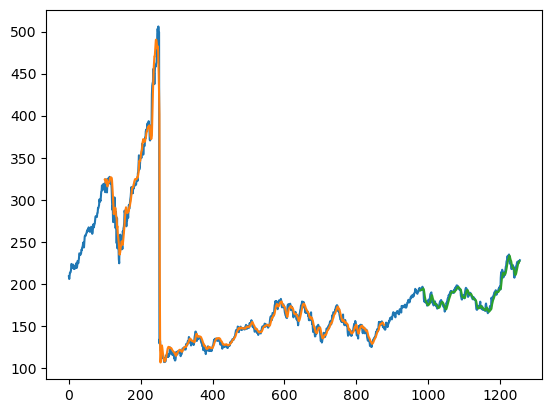

In [49]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy. empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt. plot(scaler. inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
len(test_data)

377

In [51]:
x_input=test_data[277:].reshape (1, -1)
x_input.shape

(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[0.1571446462116468,
 0.1543143393863493,
 0.15737006887914834,
 0.1526361928616155,
 0.1708202880400751,
 0.17460237946149026,
 0.16493425172197868,
 0.1566437069505322,
 0.15318722604884155,
 0.1507827175954915,
 0.1456731371321227,
 0.14777708202880396,
 0.15043206011271132,
 0.15574201628052597,
 0.15792110206637439,
 0.1564433312460864,
 0.16696305572949277,
 0.15902316844082653,
 0.1564433312460864,
 0.16578584846587346,
 0.19170945522855348,
 0.1875266123982467,
 0.189254852849092,
 0.19010644959298684,
 0.1946900438321853,
 0.19088290544771447,
 0.19897307451471502,
 0.20185347526612396,
 0.207589229805886,
 0.20788979336255475,
 0.20796493425172197,
 0.2108954289292423,
 0.21417658108954285,
 0.2105447714464621,
 0.2004758922980588,
 0.20824045084533493,
 0.2082654978083907,
 0.20901690670006257,
 0.2115216030056355,
 0.21392611145898555,
 0.2183844708829054,
 0.2191859737006887,
 0.22299311208515965,
 0.21951158422041323,
 0.22554790231684402,
 0.216105197244834,
 0.251246086

In [55]:
# demonstrate prediction for next 30 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while (i<30): 
    if(len (temp_input) >100) :
        #print (temp_input)
        x_input=np.array(temp_input [1:])
        print("{} day input {}". format(i,x_input))
        x_input=x_input.reshape (1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_ input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}". format(i, yhat))
        temp_input. extend (yhat[0].tolist())
        temp_input=temp_input [1:]
        #print (temp_input)
        lst_output.extend (yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print (yhat [0])
        temp_input. extend (yhat [0]. tolist())
        print(len (temp_input))
        lst_output. extend (yhat.tolist())
        i=i+1
print (lst_output)

[0.3038929]
101
1 day input [0.15431434 0.15737007 0.15263619 0.17082029 0.17460238 0.16493425
 0.15664371 0.15318723 0.15078272 0.14567314 0.14777708 0.15043206
 0.15574202 0.1579211  0.15644333 0.16696306 0.15902317 0.15644333
 0.16578585 0.19170946 0.18752661 0.18925485 0.19010645 0.19469004
 0.19088291 0.19897307 0.20185348 0.20758923 0.20788979 0.20796493
 0.21089543 0.21417658 0.21054477 0.20047589 0.20824045 0.2082655
 0.20901691 0.2115216  0.21392611 0.21838447 0.21918597 0.22299311
 0.21951158 0.2255479  0.2161052  0.25124609 0.26607389 0.26900438
 0.26462116 0.2750908  0.26912962 0.25758297 0.25209768 0.25372574
 0.2560551  0.26652473 0.26865373 0.25993738 0.27529117 0.2841077
 0.28731371 0.29931121 0.30301816 0.3051722  0.31594239 0.30239198
 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106 0.29422668
 0.29335003 0.29597996 0.27977458 0.27714465 0.27832185 0.27902317
 0.2804258  0.2886412  0.27932373 0.28308078 0.25655604 0.25144646
 0.25793363 0.26667502 0.27401378 0.

In [57]:
day_new=np.arange (1,101)
day_pred=np.arange (101,131)

In [58]:
import matplotlib.pyplot as plt

In [59]:
len(df1)

1256

In [60]:
df3=df1.tolist()
df3.extend (lst_output)

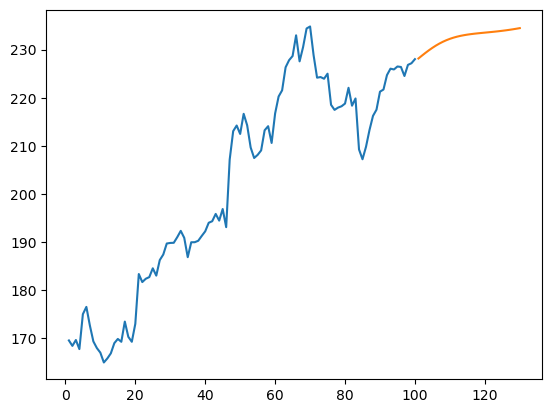

In [61]:
plt. plot(day_new, scaler.inverse_transform(df1[1156 :]))
plt. plot(day_pred, scaler. inverse_transform(lst_output))

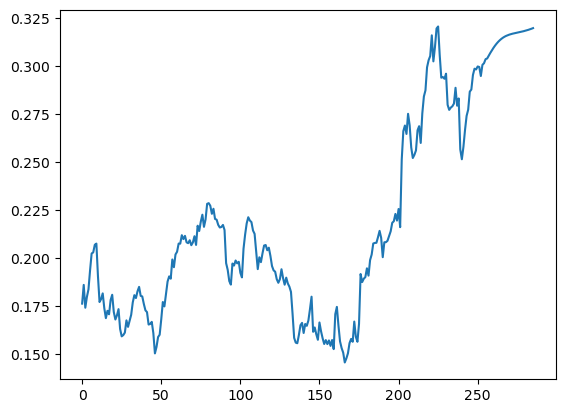

In [62]:
df3=df1. tolist()
df3. extend (lst_output)
plt.plot(df3[1000:])

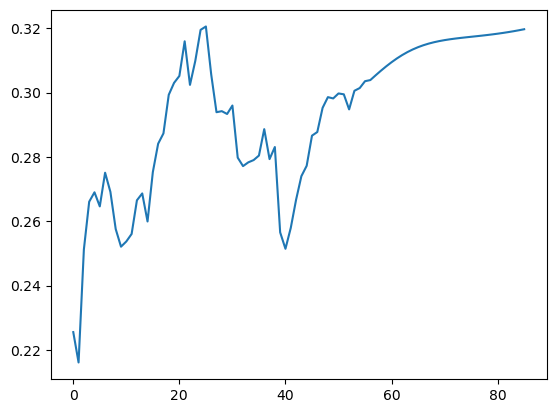

In [63]:
df3=df1. tolist()
df3. extend (lst_output)
plt.plot(df3[1200:])